In [95]:
import os # Import os commands
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# 1. Fetch The Data
This is a python notebook section that fetches the dataset for the task today.
- a) Create a directory in my workspace
- b) Download the .csv file from repository
- c) Put .csv in directory

In [56]:
# Constants

new_directory = 'dataset'
file_url = 'https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/'
file_name = 'housing.csv'

In [57]:
# a) Create a directory in my workspace

# Fetch current directory
print('Fetching your current directory...')
cwd = os.getcwd() # Get current directory
print('Current directory:',cwd) # Print current directory

# Make new directory
if not os.path.exists(new_directory): # If directory is not here already
    print(f'Creating new folder in your workspace called "{new_directory}".')
    os.mkdir(new_directory) # Create directory
else:
    print('Directory already exists!')

Fetching your current directory...
Current directory: c:\Users\leon.helgeland\Documents\GitHub\machine-learning-course\Session-2-significance-of-data
Directory already exists!


- b) Download the .csv file from repository

# 2. Load the data
Create a small function in order to load your dowloaded data into a Pandas
DataFrame object

In [64]:
if not os.path.exists(f'{new_directory}\{file_name}'):
    df = pd.read_csv(file_url+file_name)    
    df.to_csv(f'{new_directory}\{file_name}')
else:
    print('File already exists!')
    if df.empty:
        print('Dataframe is empty, reading csv...')
        df = pd.read_csv(file_url+file_name)
    else:
        print('Dataframe is loaded and ready.')

File already exists!
Dataframe is loaded and ready.


# 3. Take a glance at the data
Are the
data attributes numerical or not? Moreover you can plot a histogram for the
numerical attributes of your data using hist() method to get a better feel of the
type of the data you dealing with.

In [71]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [74]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [68]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022DDE6EDCC8>,
      dtype=object)

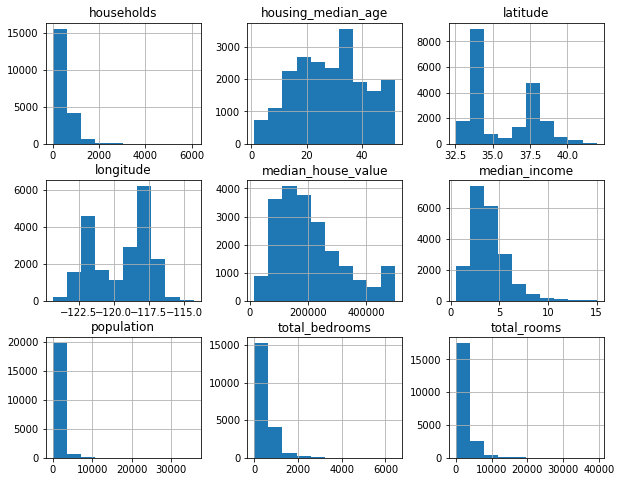

In [70]:
df.hist(figsize=(10,8))

# 4. Split the data
Use Scikit-Learn functions such as train_test_split() to split your data into
training and testing datasets

In [80]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [87]:
y = df['median_house_value']
X = df[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
    'total_bedrooms', 'population', 'households', 'median_income',
    'ocean_proximity']]

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # train_test_split(X.values.reshape(-1,1), y, test_size=0.3, random_state=42)

# 5. Visualise your data
Create a scatterplot of all districts to visualise the data using the attributes
‘latitude’ and ‘longitude’. (Hint: Since those attributes contain geographical
information the scatterplot should have the shape of California)

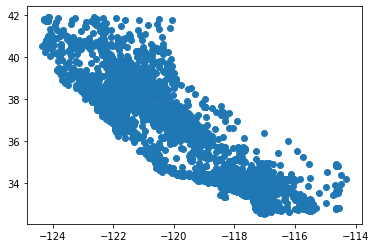

In [90]:
plt.scatter(df['longitude'],df['latitude'])

# 6. Investigate attribute correlation
Compute the linear correlation between each attribute and the
‘median_house_value’ using the corr() method. What’s the most promising
attribute to predict the median house value?

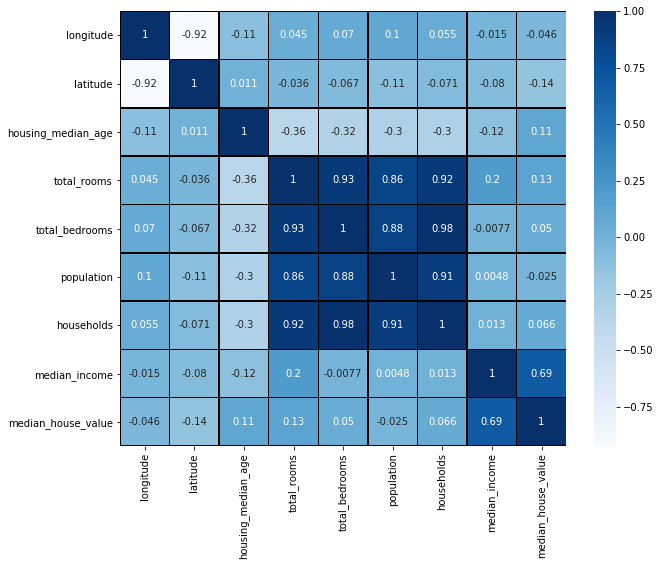

In [94]:
correlation = df.corr()

import seaborn as sns

plt.subplots(figsize=(10, 8))
sns.heatmap(correlation, linecolor='black', linewidth=0.5, annot=True, cmap='Blues')

That would be median_income.

# 7. Dealing with missing values
Are there any attributes with missing values? If so, you need to find ways to 
- a) get rid of instances with missing values
- b) get rid of the entire lacking attribute
- and c) fill in the missing values with values that make sense to you, using some
Pandas methods.

In [115]:
print('Using df.info() we can immediately see if there are any attributes with less values, as we can see total_bedrooms has a lower total amount of rows.\n')
df.info()

Using df.info() we can immediately see if there are any attributes with less values, as we can see total_bedrooms has a lower total amount of rows.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Using this command we can bring up the rows to be worked on

In [107]:
bool_series = pd.isnull(df['total_bedrooms'])
df[bool_series]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


In [116]:
# Filling missing values with mean and if time, median.

df['total_bedrooms'].fillna((df['total_bedrooms'].mean()), inplace=True)


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


As we can now see the df.info() command shows that the total_bedrooms attribute now has the same amount of non-null values. This is because we replaced the missing values with the columns mean value. We could also do median if we wanted to.

PS: ML says that we split the data before cleaning NaN values.

# 8. Dealing with categorical attributes
If there are any categorical attributes in your dataset, see how you can handle
them and create on-hot vectors using the LabelBinarizer() class of Scikit-Learn.

In [119]:
ocean_proxy = pd.get_dummies(X['ocean_proximity'],drop_first=True)
X = X.drop('ocean_proximity',axis=1)
X = pd.concat([X,ocean_proxy],axis=1)

In [122]:
X.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income', 'INLAND',
       'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype='object')

In [125]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,0,0,1,0


It is also possible to turn the binary columns into a non-binary integer single column.